<a href="https://colab.research.google.com/github/martuscellifaria/FluidsAcousticsHeat/blob/master/1D%20Cartesian%20Heat%20Diffusion%20Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **1D Heat Diffusion**
So, this time it's heat equation solving. Let's jump right in a 1D Unsteady heat diffusion problem. We'll start from a L = 2 m 304A Stainless Steel bar initially at 20 C. We'll add a rapidly heat up in the region of L/4 < x < L/2 to 80 C and cease the source immediately. The default solution is performed for 30 min, but you can change it to whatever time you want. You'll notice a slight increase in computational time as it is increased.

## **1 Import libraries**
Yeah, I know you already got it.

In [73]:
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

## **2 Set your variables and calculate time and space divisions**

In [74]:
L = 2 #Length in m
t = 30*60 #Time in s
nx = 801
dx = L / (nx - 1)
nu = 4.2*(10**-6) #Thermal diffusivity (in this case, it is for Stainless Steel 304A) in m²/s
sigma = .2
dt = sigma * dx**2 / nu
nt = t/dt
T_0 = 20 #Initial temperature in degrees Celsius

## **3 Initialize your problem**
Ya know, initial and/or boundary conditions

In [75]:
T = T_0*numpy.ones(nx)      #Initialize the temperature vector
T[int((L/4) / dx):int((L/2) / dx + 1)] = 80  #Set the initial conditions

T_n = T_0*numpy.ones(nx) #Placeholder temperature vector

## **4 Discretize the 1D Heat Equation and run the calculation!**

In [76]:
for n in range(round(nt)):  #iterate through time
    Tn = T.copy() ##copy the existing values of u into un
    for i in range(1, nx - 1):
        T[i] = Tn[i] + nu * dt / dx**2 * (Tn[i+1] - 2 * Tn[i] + Tn[i-1])

## **5 Plot the results**
In this case, we're getting the temperature distribution at the end of the time interval set.

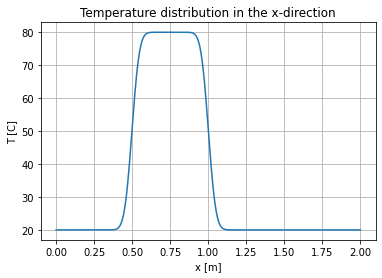

In [77]:
plt.plot(numpy.linspace(0, L, nx), T)
plt.title("Temperature distribution in the x-direction")
plt.xlabel('x [m]')
plt.ylabel('T [C]')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()